In [30]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_bloch_multivector
from iqx import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-01-30 16:23:01,525: Credentials are already in use. The existing account in the session will be replaced.


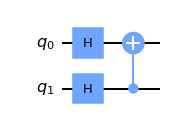

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(1,0)
qc.draw()

In [3]:
def printUnitaryMatrix(inputCircuit, matrixText="Unitary Matrix"):
    tmp_unitary_backend = Aer.get_backend('unitary_simulator')
    display(inputCircuit.draw())
    inPreText = "\\text{" + matrixText + "} = "
    array_to_latex(execute(inputCircuit,tmp_unitary_backend).result().get_unitary(inputCircuit, decimals=1), pretext=inPreText, precision=1)

In [4]:
def printStateVector(inputCircuit, stateVectorText="Statevector"):
    tmp_statevector_backend = Aer.get_backend('statevector_simulator')
    final_statevector = execute(inputCircuit,statevector_backend).result().get_statevector()
    inPreText = "\\text{" + stateVectorText + "} = "
    array_to_latex(final_statevector, pretext=inPreText, precision=1)

In [5]:
def printAll(inputCircuit, vectorAndMatrixText="Statevector"):
    printStateVector(inputCircuit, vectorAndMatrixText)
    printUnitaryMatrix(inputCircuit, vectorAndMatrixText)

<IPython.core.display.Math object>

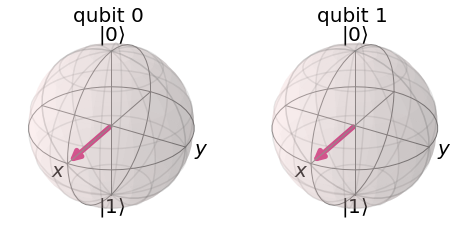

In [6]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [7]:
unitary_backend = Aer.get_backend('unitary_simulator')
array_to_latex(execute(qc,unitary_backend).result().get_unitary(qc, decimals=1), pretext="\\text{Unitary Matrix} = ", precision=1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

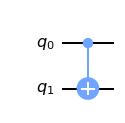

<IPython.core.display.Math object>

In [8]:
cnotQc = QuantumCircuit(2)
cnotQc.cx(0,1)
printAll(cnotQc, "CNOT")

In [9]:
testQc = QuantumCircuit(2)
testQc.h(0)
testQc.h(1)

<IPython.core.display.Math object>

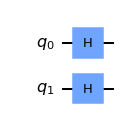

<IPython.core.display.Math object>

In [10]:
printAll(testQc)

<IPython.core.display.Math object>

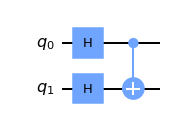

<IPython.core.display.Math object>

In [11]:
testQc2 = QuantumCircuit(2)
testQc2.h(0)
testQc2.h(1)
testQc2.cx(0,1)
printAll(testQc2)

<IPython.core.display.Math object>

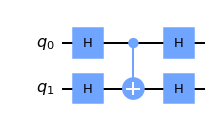

<IPython.core.display.Math object>

In [12]:
testQc3 = QuantumCircuit.copy(testQc2)
testQc3.h(0)
testQc3.h(1)
printAll(testQc3, "H CNOT H = INVERSE CNOT")

<IPython.core.display.Math object>

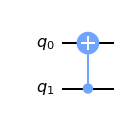

<IPython.core.display.Math object>

In [13]:
inverseCnotQc = QuantumCircuit(2)
inverseCnotQc.cx(1,0)
printAll(inverseCnotQc, "INVERSE CNOT")

<IPython.core.display.Math object>

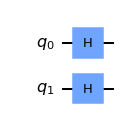

<IPython.core.display.Math object>

In [14]:
qcPlusPlus = QuantumCircuit(2)
qcPlusPlus = qcPlusPlus.combine(testQc)
printAll(qcPlusPlus, "|++>")

<IPython.core.display.Math object>

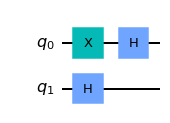

<IPython.core.display.Math object>

In [15]:
qcPlusMinus = QuantumCircuit(2)
qcPlusMinus.x(0)
qcPlusMinus = qcPlusMinus.combine(testQc)
printAll(qcPlusMinus, "|+->")

<IPython.core.display.Math object>

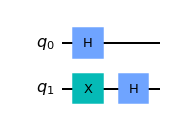

<IPython.core.display.Math object>

In [16]:
qcMinusPlus = QuantumCircuit(2)
qcMinusPlus.x(1)
qcMinusPlus = qcMinusPlus.combine(testQc)
printAll(qcMinusPlus, "|-+>")

<IPython.core.display.Math object>

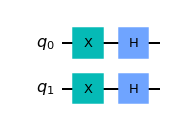

<IPython.core.display.Math object>

In [17]:
qcMinusMinus = QuantumCircuit(2)
qcMinusMinus.x(0)
qcMinusMinus.x(1)
qcMinusMinus = qcMinusMinus.combine(testQc)
printAll(qcMinusMinus, "|-->")

<IPython.core.display.Math object>

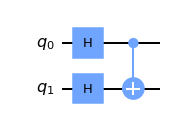

<IPython.core.display.Math object>

In [18]:
testQc4 = QuantumCircuit(2)
testQc4 = testQc4.combine(qcPlusPlus)
testQc4.cx(0,1)
printAll(testQc4, "CNOT|++> = |++>")

<IPython.core.display.Math object>

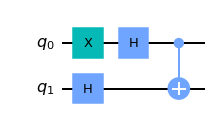

<IPython.core.display.Math object>

In [19]:
testQc5 = QuantumCircuit(2)
testQc5 = testQc5.combine(qcPlusMinus)
testQc5.cx(0,1)
printAll(testQc5, "CNOT|+-> = |+->")

<IPython.core.display.Math object>

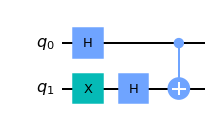

<IPython.core.display.Math object>

In [20]:
testQc6 = QuantumCircuit(2)
testQc6 = testQc6.combine(qcMinusPlus)
testQc6.cx(0,1)
printAll(testQc6, "CNOT|-+> = |--> PHASE KICK BACK")

<IPython.core.display.Math object>

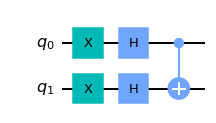

<IPython.core.display.Math object>

In [21]:
testQc7 = QuantumCircuit(2)
testQc7 = testQc7.combine(qcMinusMinus)
testQc7.cx(0,1)
printAll(testQc7, "CNOT|--> = |-+>")

<IPython.core.display.Math object>

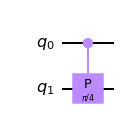

<IPython.core.display.Math object>

In [25]:
from math import pi
qt = QuantumCircuit(2)
qt.cp(pi/4, 0, 1)
printAll(qt, "Controlled-T")

<IPython.core.display.Math object>

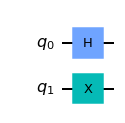

<IPython.core.display.Math object>

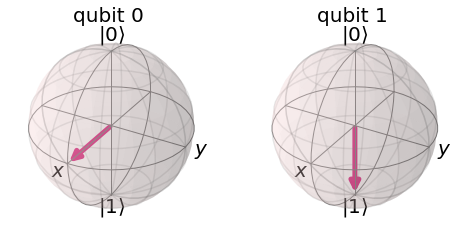

In [44]:
qt_base = QuantumCircuit(2)
qt_base.h(0)
qt_base.x(1)
printAll(qt_base, "base")
final_state = execute(qt_base,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

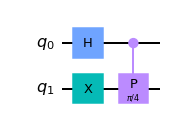

<IPython.core.display.Math object>

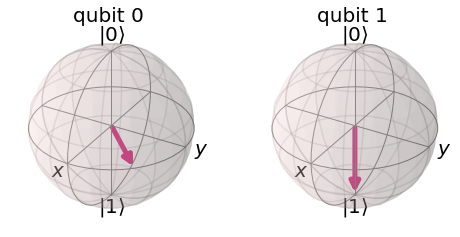

In [47]:
qct = QuantumCircuit(2)
qct = qct.combine(qt_base)
qct.cp(pi/4,0,1)
printAll(qct, "Controlled T")
final_state = execute(qct,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

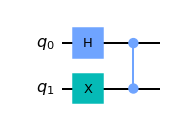

<IPython.core.display.Math object>

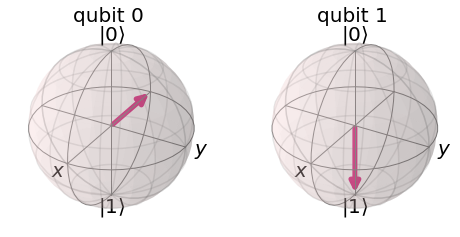

In [48]:
qcz = QuantumCircuit(2)
qcz = qcz.combine(qt_base)
qcz.cz(0,1)
printAll(qcz, "Controlled Z [0,1]")
final_state = execute(qcz,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

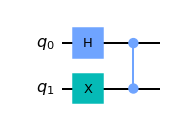

<IPython.core.display.Math object>

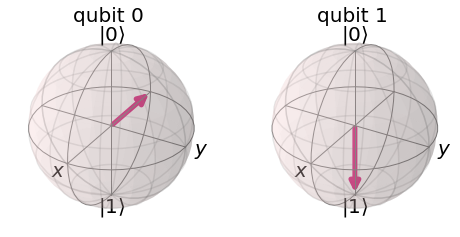

In [49]:
qcz2 = QuantumCircuit(2)
qcz2 = qcz2.combine(qt_base)
qcz2.cz(1,0)
printAll(qcz2, "Controlled Z [1,0]")
final_state = execute(qcz,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)